In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Data Loading and Exploratory Data Analysis

In [2]:
df = pd.read_csv('train.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


Checking for any missing values

In [4]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

We have no missing values in all our attributes.  
No need for data cleaning techniques e.g. data imputation

Data types in our dataset

In [5]:
df.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

All attributes are numeric.  
No need for data transformations like one-hot-encoding in the case of categorical features that are of type string.    
However, some features are categorical in nature (e.g. blue- has blue tooth, dual_sim - supports dual sim etc.) so we need to keep that in mind.

Lets check for any duplicate records and remove them in case there are any.

In [5]:
duplicates = df.duplicated()
duplicates.sum()

0

No duplicate records

Lets see basic descriptive statistics of our dataset in order to understand it better.

In [6]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


## Outlier detection

Now lets check whether we have any outliers and decide whether we should remove them or not.  
We will plot box-plots for all non-categorical variables. Such variables are:  

- battery_power: Total energy a battery can store in one time measured in mAh  
- clock_speed: speed at which microprocessor executes instructions  
- fc: Front Camera mega pixels  
- int_memory: Internal Memory in Gigabytes 
- m_dep: Mobile Depth in cm
- mobile_wt: Weight of mobile phone
- n_cores: Number of cores of processor
- pc: Primary Camera mega pixels
- px_height: Pixel Resolution Height
- px_width: Pixel Resolution Width
- ram: Random Access Memory in Mega Bytes 
- sc_h: Screen Height of mobile in cm
- sc_w: Screen Width of mobile in cm
- talk_time: longest time that a single battery charge will last when you are


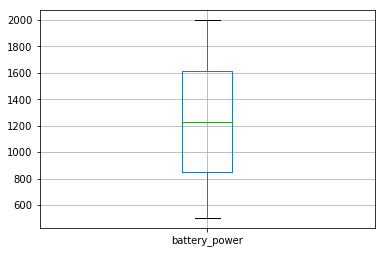

In [14]:
df.boxplot(column='battery_power')

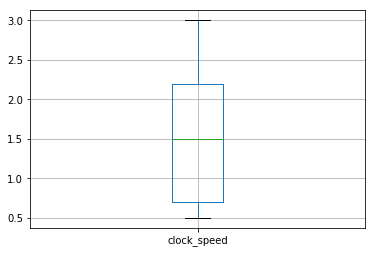

In [15]:
df.boxplot(column='clock_speed')

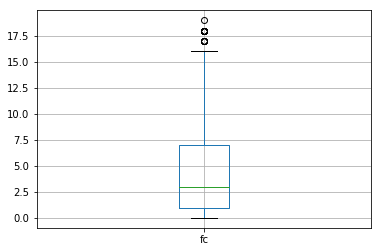

In [16]:
df.boxplot(column='fc')

There seem to be a few outliers in this feature. A few phones have way higher front camera megapixels compared to the average phone.

In [17]:
df['fc'].describe()

count    2000.000000
mean        4.309500
std         4.341444
min         0.000000
25%         1.000000
50%         3.000000
75%         7.000000
max        19.000000
Name: fc, dtype: float64

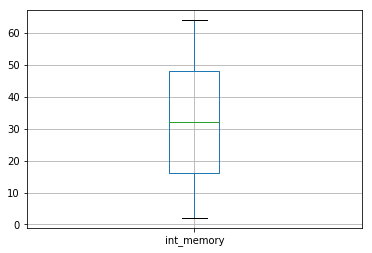

In [18]:
df.boxplot(column='int_memory')

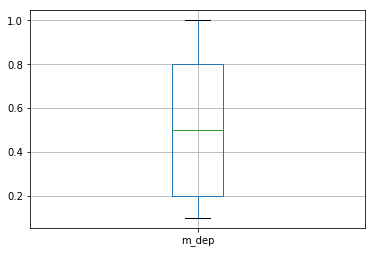

In [19]:
df.boxplot(column='m_dep')

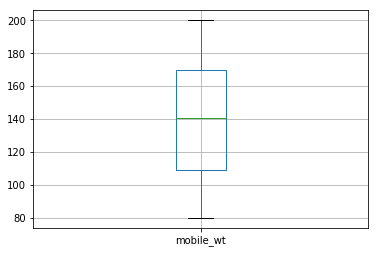

In [20]:
df.boxplot(column='mobile_wt')

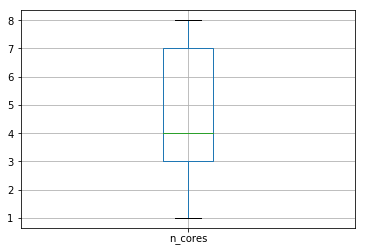

In [21]:
df.boxplot(column='n_cores')

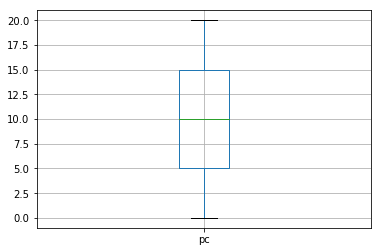

In [22]:
df.boxplot(column='pc')

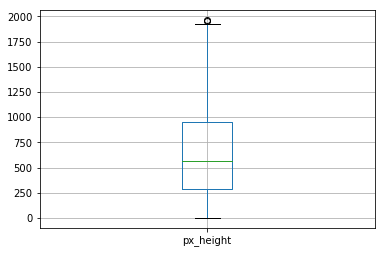

In [28]:
df.boxplot(column='px_height')

There seem to be a few outliers in this feature. A few phones have way greater pixel resolution height compared to the average phone.

In [30]:
df['px_height'].describe()

count    2000.000000
mean      645.108000
std       443.780811
min         0.000000
25%       282.750000
50%       564.000000
75%       947.250000
max      1960.000000
Name: px_height, dtype: float64

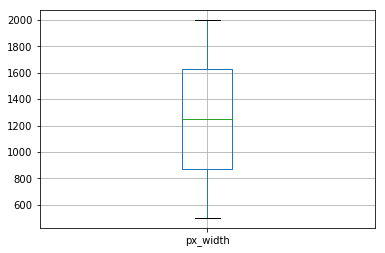

In [29]:
df.boxplot(column='px_width')

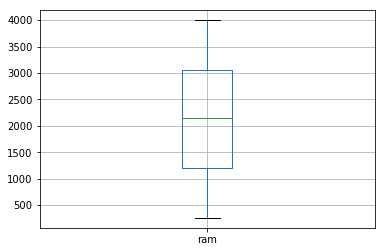

In [24]:
df.boxplot(column='ram')

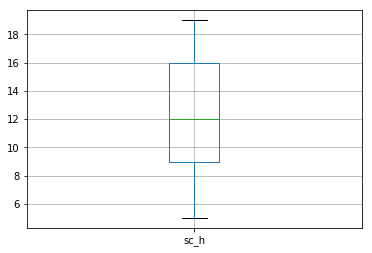

In [25]:
df.boxplot(column='sc_h')

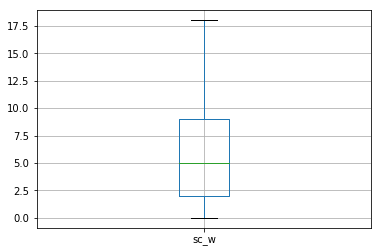

In [26]:
df.boxplot(column='sc_w')

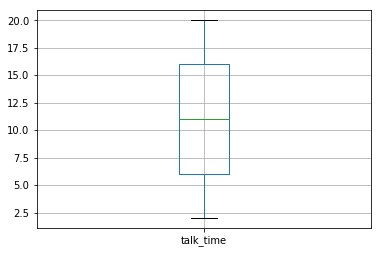

In [27]:
df.boxplot(column='talk_time')

It looks like the two of our feature have outliers. Those features are:   

- fc: Front Camera mega pixels
- px_height: Pixel Resolution Height  

At this point, I will not remove the outliers, mainly because the don't seem to be data entry errors, but it would be interesting to see if removing them will increase the performance of our final model.

## Correlation Analysis

Lets investigate the correlation in our dataset.

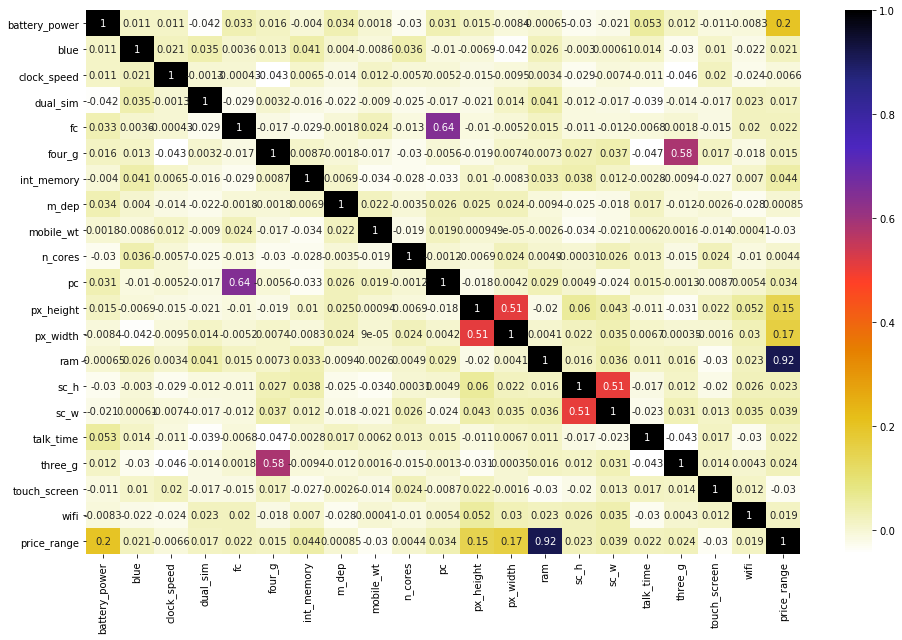

In [32]:
plt.figure(figsize=(16,10))
cor = df.corr()

sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

### Correlations between independent variables

Primary camera megapixels (pc) and front camera megapixels (fc) are correlated, which seems intuitive.  

A phone having 3g and a phone having 4g is also correlated.  

However, the degree of correlation between these variables is not high enough to justify removing one of them at this point.

### Correlation between the dependent variable (price range) and the independent variables

**Price range**, which is the variables we are trying to predict is **highly correlated** with **RAM**.  

It is also somewhat correlated with  

- battery power
- pixel height
- pixel width 

although on a much smaller degree compared to RAM

## Bar plots for variables with small number of outcomes

We are going to visualize features with small number of outcomes using bar plots.  

For the rest of them, we are going to use density plots.

In [40]:
features_with_many_outcomes = []
features_with_few_outcomes = []

for i in df:
    if(df[i].nunique()<30):
        features_with_few_outcomes.append(i)
    else:
        features_with_many_outcomes.append(i)


In [41]:
features_with_few_outcomes

['blue',
 'clock_speed',
 'dual_sim',
 'fc',
 'four_g',
 'm_dep',
 'n_cores',
 'pc',
 'sc_h',
 'sc_w',
 'talk_time',
 'three_g',
 'touch_screen',
 'wifi',
 'price_range']

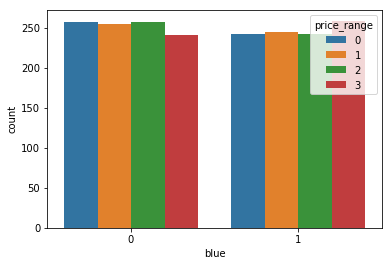

In [39]:
sns.countplot(x='blue', hue='price_range', data=df)

More expensive phones tend to have blue tooth, which makes intuitive sense, although the differences between price ranges are not that extreme. This supports the claim that the dataset is pretty outdated since almost all phones these days have blue tooth. 

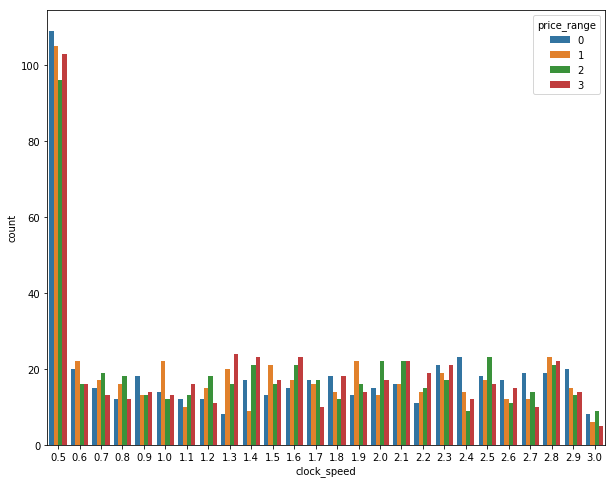

In [43]:
plt.figure(figsize=(10,8))
sns.countplot(x='clock_speed', hue='price_range', data=df)

As clock speed increases, we don't see a notable change in price range.  
Clock speed is probably not a good predictor of price range for this dataset at least.  
We also see a big concentration on very low clock speeds, further indicating that the dataset contains a lot of old and slow phones.

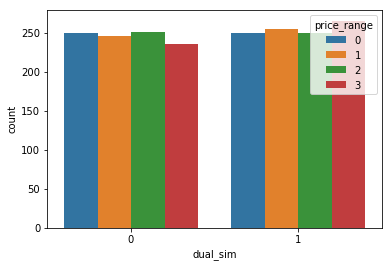

In [44]:
sns.countplot(x='dual_sim', hue='price_range', data=df)

Expensive phones tend to support dual-sim. Makes sense.

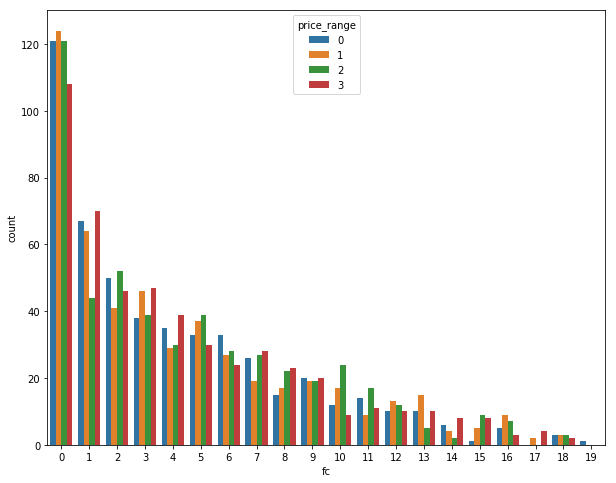

In [46]:
plt.figure(figsize=(10,8))
sns.countplot(x='fc', hue='price_range', data=df)

Phones with maximum front camera resolution are actually cheaper. This is unusual.  
Also, we have a lot of phones with no front camera and a lot of them are in the high price range.

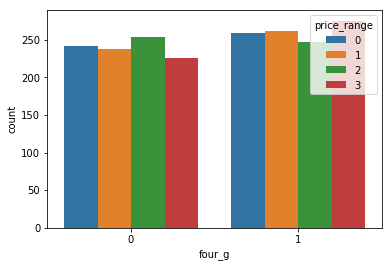

In [47]:
sns.countplot(x='four_g', hue='price_range', data=df)

Similar to dual sim, a lot of expensive phones tend to support four_g.

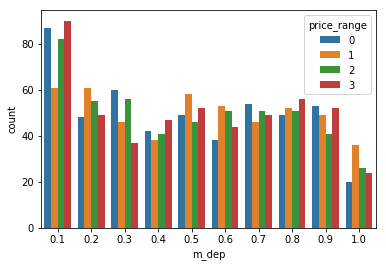

In [48]:
sns.countplot(x='m_dep', hue='price_range', data=df)

No noticeable trend here. However, very thin phones (0.1 mm depth) are mostly in the high price range.

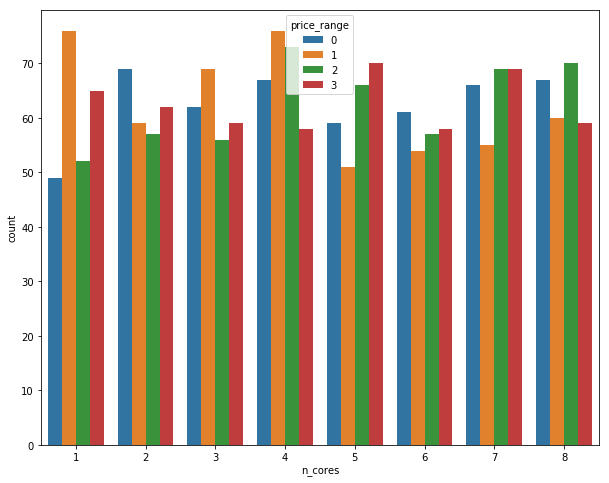

In [50]:
plt.figure(figsize=(10,8))
sns.countplot(x='n_cores', hue='price_range', data=df)

No noticeable trend here either. Octa-core phones don't seem to be the most expensive ones.

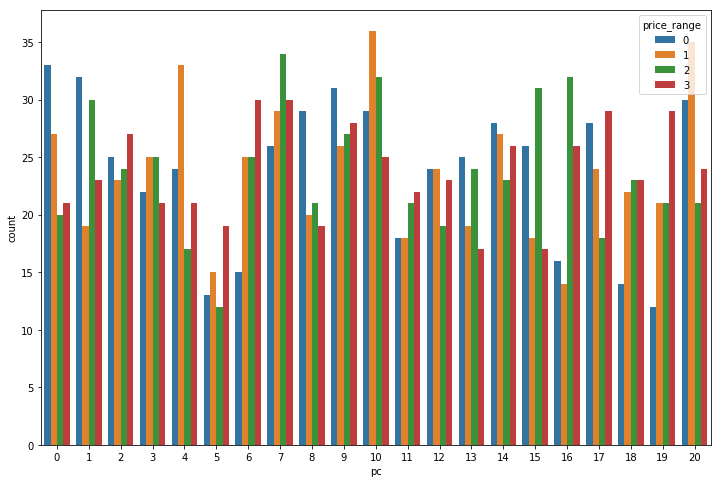

In [53]:
plt.figure(figsize=(12,8))
sns.countplot(x='pc', hue='price_range', data=df)

Again, no noticeable trend in price range in relation to main camera resolution.

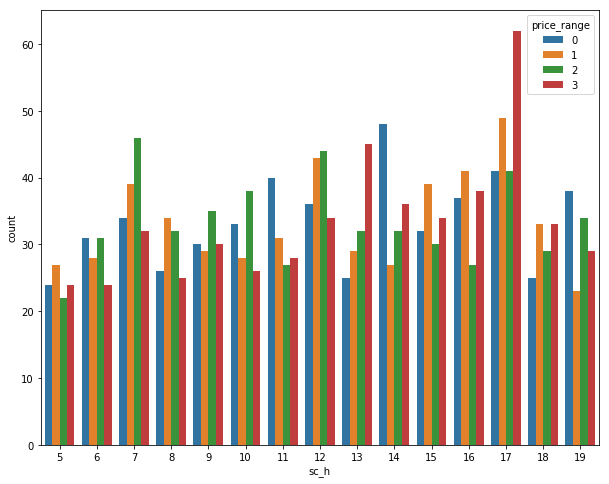

In [55]:
plt.figure(figsize=(10,8))
sns.countplot(x='sc_h', hue='price_range', data=df)

We see a lot of expensive phones with large screen height (17 cm) but not a clear trend.

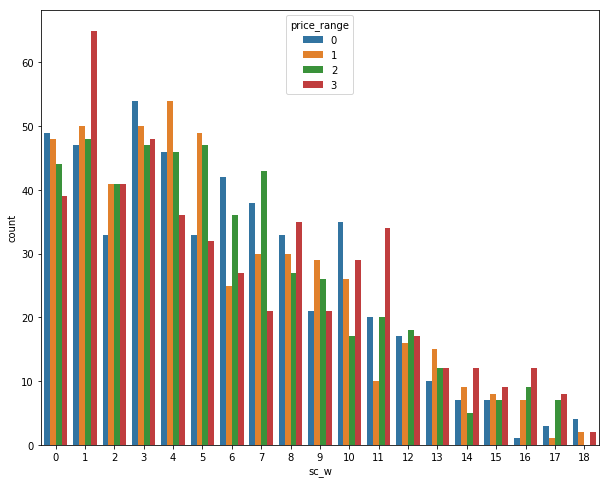

In [57]:
plt.figure(figsize=(10,8))
sns.countplot(x='sc_w', hue='price_range', data=df)

Phones tend to be smaller in width, in general, but no clear relationship between width an price range.

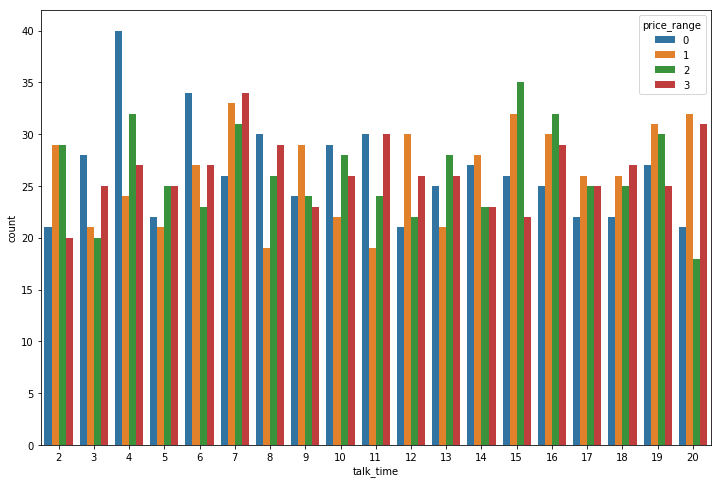

In [60]:
plt.figure(figsize=(12,8))
sns.countplot(x='talk_time', hue='price_range', data=df)

Cheap phones (price range = 0) are less likely to outperform more expensive phones (price range = 1,2,3) in talk time but the most expensive ones (price range = 3) are not always the ones with more talk time. This feature might be helpful in our prediction although not very much.

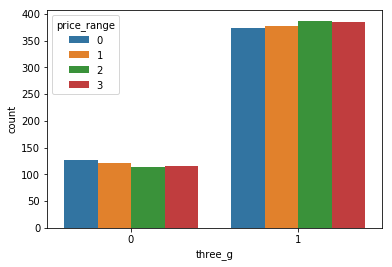

In [61]:
sns.countplot(x='three_g', hue='price_range', data=df)

Not much to say here. 3g is pretty outdated and we have more phones in general that support it. It's strange to see that we have an almost equal amount expensive phones and cheap phones that don't support 3g. Again, this is probably due to the fact that the dataset contains a lot of old phones.

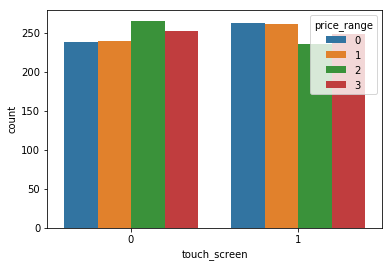

In [62]:
sns.countplot(x='touch_screen', hue='price_range', data=df)

This is unusual. Most of the phones having touch screen are also cheaper. Vise versa, phones that don't support touch screen tend to be more expensive.

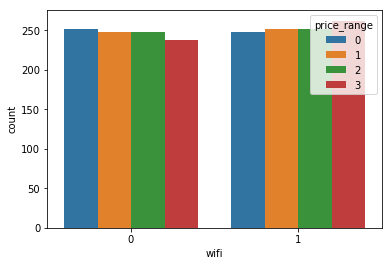

In [63]:
sns.countplot(x='wifi', hue='price_range', data=df)

A small linear trend is visible here. Phones that don't support wifi are cheaper and phones that support it are more expensive.

## Histograms for variables with large number of outcomes.

In [25]:
features_with_many_outcomes

['battery_power', 'int_memory', 'mobile_wt', 'px_height', 'px_width', 'ram']

Split the data to different price ranges so we can visualize them next to each other.

In [19]:
price0df = df.loc[df['price_range']==0]
price1df = df.loc[df['price_range']==1]
price2df = df.loc[df['price_range']==2]
price3df = df.loc[df['price_range']==3]

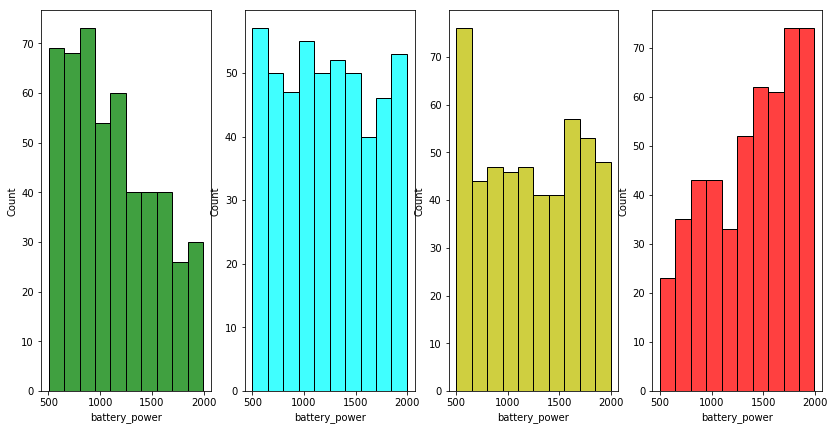

In [44]:
fig, ax = plt.subplots(1,4,figsize=(14,7))
sns.histplot(price0df, x ='battery_power',ax=ax[0],color='g')
sns.histplot(price1df, x ='battery_power',ax=ax[1],color='aqua')
sns.histplot(price2df, x ='battery_power',ax=ax[2],color='y')
sns.histplot(price3df, x ='battery_power',ax=ax[3],color='r')

In the cheap price range we see a clear trend. Phone counts are decreasing as we increase battery power.  
In the most expensive price range we see the exact opposite trend. Phone counts are increasing as we increase battery power.  
The two middle price range don't show a clear trend.  
This feature seems like a valid candidate for our feature set.

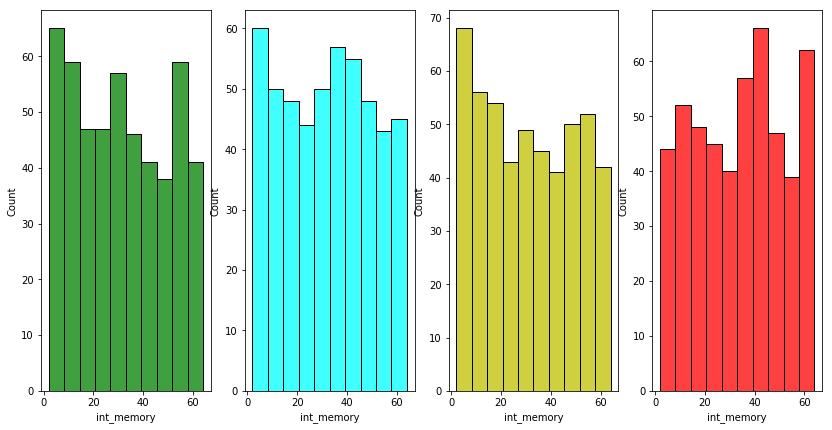

In [51]:
fig, ax = plt.subplots(1,4,figsize=(14,7))
sns.histplot(price0df, x ='int_memory',ax=ax[0],color='g')
sns.histplot(price1df, x ='int_memory',ax=ax[1],color='aqua')
sns.histplot(price2df, x ='int_memory',ax=ax[2],color='y')
sns.histplot(price3df, x ='int_memory',ax=ax[3],color='r')

Internal memory seems to slightly increase the price range, although the effect is not as apparent as in the case of battery power.

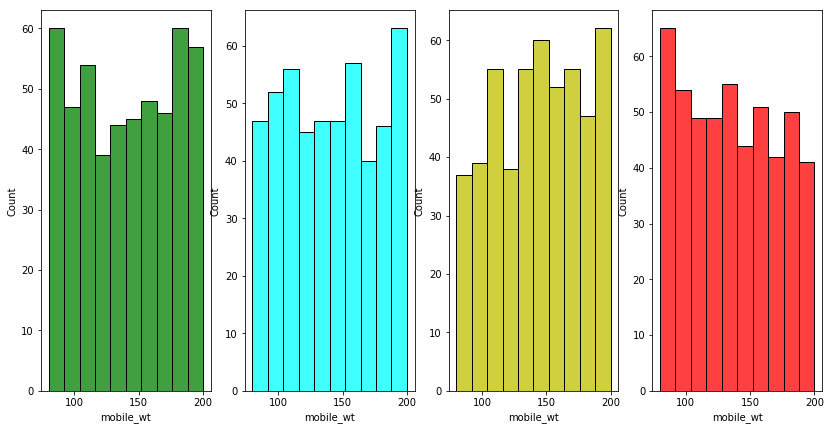

In [46]:
fig, ax = plt.subplots(1,4,figsize=(14,7))
sns.histplot(price0df, x ='mobile_wt',ax=ax[0],color='g')
sns.histplot(price1df, x ='mobile_wt',ax=ax[1],color='aqua')
sns.histplot(price2df, x ='mobile_wt',ax=ax[2],color='y')
sns.histplot(price3df, x ='mobile_wt',ax=ax[3],color='r')

The only apparent trend we notice is in the high price range. The most expensive phones tend to be lighter.

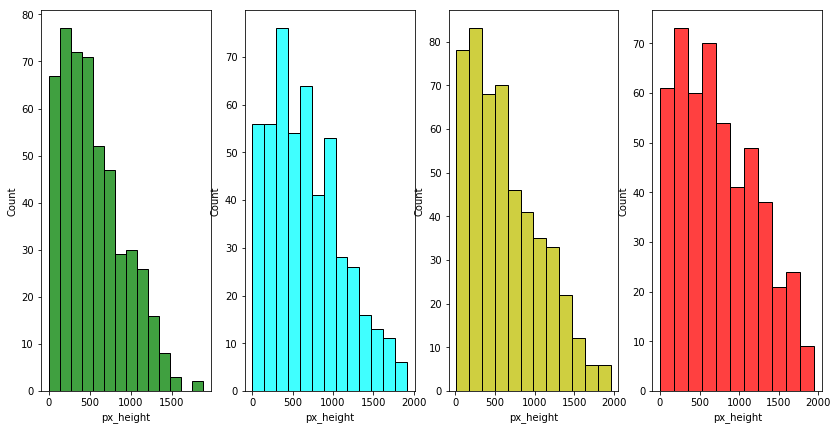

In [50]:
fig, ax = plt.subplots(1,4,figsize=(14,7))
sns.histplot(price0df, x ='px_height',ax=ax[0],color='g')
sns.histplot(price1df, x ='px_height',ax=ax[1],color='aqua')
sns.histplot(price2df, x ='px_height',ax=ax[2],color='y')
sns.histplot(price3df, x ='px_height',ax=ax[3],color='r')

Pixel height follows the same trend across all price ranges. 
We see an increase in phone counts as we increase the price range but only for pixel heights in the range between 1000 and 2000 pixels.

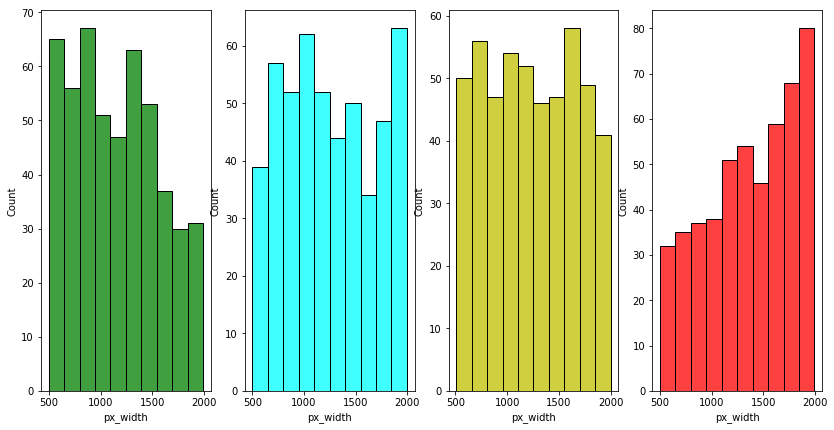

In [49]:
fig, ax = plt.subplots(1,4,figsize=(14,7))
sns.histplot(price0df, x ='px_width',ax=ax[0],color='g')
sns.histplot(price1df, x ='px_width',ax=ax[1],color='aqua')
sns.histplot(price2df, x ='px_width',ax=ax[2],color='y')
sns.histplot(price3df, x ='px_width',ax=ax[3],color='r')

An even more apparent effect that pixel height. Higher pixel width values seem to be associated with higher price ranges. 

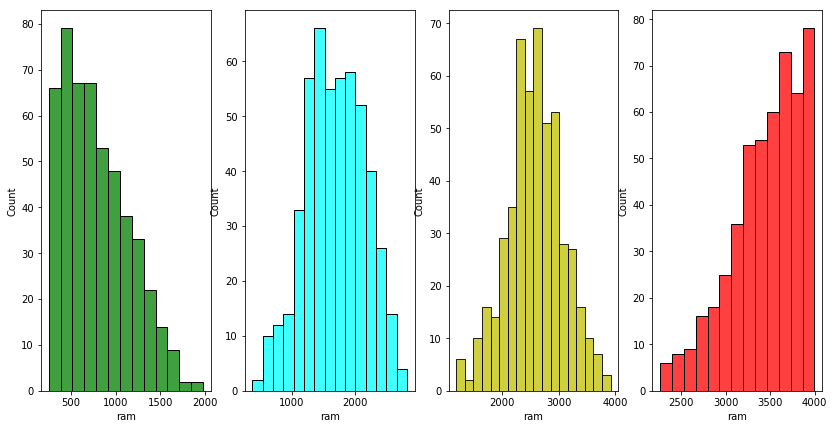

In [48]:
fig, ax = plt.subplots(1,4,figsize=(14,7))
sns.histplot(price0df, x ='ram',ax=ax[0],color='g')
sns.histplot(price1df, x ='ram',ax=ax[1],color='aqua')
sns.histplot(price2df, x ='ram',ax=ax[2],color='y')
sns.histplot(price3df, x ='ram',ax=ax[3],color='r')

Ram size shows the most apparent effect out of all the variables we explored.  
As we increase the price range, we see a higher count of phones in the high ram sizes.  
It is clear that RAM size greatly affects the price range of a phone.

# Model building

During our exploratory data analysis we observed that the price range of a mobile phone is greatly affected by its RAM size and slightly affected by other variables such as battery power and screen resolution.  
We will therefore give greater emphasis to those features when building our predictive model and probably neglect a lot of the other irrelevant features.  

Our final goal is to deploy the model in a web application where the user supplies attributes about the mobile phone and we predict its price range according to his/her inputs. Therefore, we wish to have a smaller feature set so that the user experience is better, since he/she will not have to supply a lot of information in order to get the final result.

## Feature selection

In [3]:
df = pd.read_csv('train.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
X = df.iloc[:,0:-1]
Y = df.iloc[:,-1]

We will select the best features using sklearn's SelectKBest function and will will use the f_classif metric to rate our features.  

We already know from our exploratory data analysis that the most significant features are 4 at most.  
This is great for reducing the number of inputs for our model, since we want to deploy it online and make the user experience friendly.

However, i think a few more features wont do much harm in user experience and they will probably make our model better in terms of performance.  
Something like 7 features seems like a good balance.

In [5]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from numpy import set_printoptions

numberOfFeatures = 7

# feature extraction using f value
bestFeatures = SelectKBest(score_func=f_classif, k=numberOfFeatures)
fit = bestFeatures.fit(X, Y)

#store the scores and column names
dfscores = pd.DataFrame(fit.scores_)
dfColumns = pd.DataFrame(X.columns)


featureScores = pd.concat([dfColumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
bestFeaturesScores =  featureScores.nlargest(numberOfFeatures,'Score')
bestFeaturesScores

,Specs,Score
13,ram,3520.110824
0,battery_power,31.598158
12,px_width,22.620882
11,px_height,19.484842
8,mobile_wt,3.594318
6,int_memory,2.922996
9,n_cores,2.625415


The 7 best features seem to be: 

- RAM
- Battery power
- Pixel width
- Pixel height
- Mobile weight
- Internal memory
- Number of cores  

From now on, we will proceed to model building using only these 7 features.

In [6]:
selectedFeatures =  bestFeaturesScores['Specs'][0:7]
X =X[selectedFeatures]
X.head()

,ram,battery_power,px_width,px_height,mobile_wt,int_memory,n_cores
0,2549,842,756,20,188,7,2
1,2631,1021,1988,905,136,53,3
2,2603,563,1716,1263,145,41,5
3,2769,615,1786,1216,131,10,6
4,1411,1821,1212,1208,141,44,2


## Model Selection

We will test different models with different hyperparameters and choose the one that gives us the best accuracy.

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33,random_state =0)
X_train.head(5)

,ram,battery_power,px_width,px_height,mobile_wt,int_memory,n_cores
295,1652,1162,997,56,114,56,7
364,1470,916,992,188,195,36,4
862,3078,1065,928,188,89,14,2
1751,2175,508,1195,102,82,50,5
1403,2674,1328,1156,602,144,27,3


### K-nearest neighbors

In [273]:
from sklearn.neighbors import KNeighborsClassifier


#### Scaled features

In [274]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
scaler.mean_

C:\Users\Paul\.conda\envs\ml\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Paul\.conda\envs\ml\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([2096.94 , 1237.822, 1257.541,  655.897,  139.488,   31.993,
          4.513])

In [275]:
knnDataframe = pd.DataFrame(columns=['k','TestScore'])

for k in range(1,50):

    numOfNeighbors = k

    knnClassifier = KNeighborsClassifier(n_neighbors=numOfNeighbors)
    
    
    knnClassifier.fit(X_train_scaled,y_train)
    
    X_test_scaled = scaler.fit_transform(X_test)
    
    
    y_pred = knnClassifier.predict(X_test_scaled)
    
    testScore = accuracy_score(y_pred,y_test)

    knnDataframe = knnDataframe.append({'k': numOfNeighbors,'TestScore':testScore}, ignore_index=True)
    
knnDataframe.nlargest(5,'TestScore')

C:\Users\Paul\.conda\envs\ml\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Paul\.conda\envs\ml\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Paul\.conda\envs\ml\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Paul\.conda\envs\ml\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Paul\.conda\envs\ml\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were al

C:\Users\Paul\.conda\envs\ml\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Paul\.conda\envs\ml\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Paul\.conda\envs\ml\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Paul\.conda\envs\ml\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Paul\.conda\envs\ml\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to

C:\Users\Paul\.conda\envs\ml\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Paul\.conda\envs\ml\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Paul\.conda\envs\ml\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Paul\.conda\envs\ml\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Paul\.conda\envs\ml\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to

,k,TestScore
31,32.0,0.795455
44,45.0,0.793939
29,30.0,0.792424
30,31.0,0.790909
45,46.0,0.790909


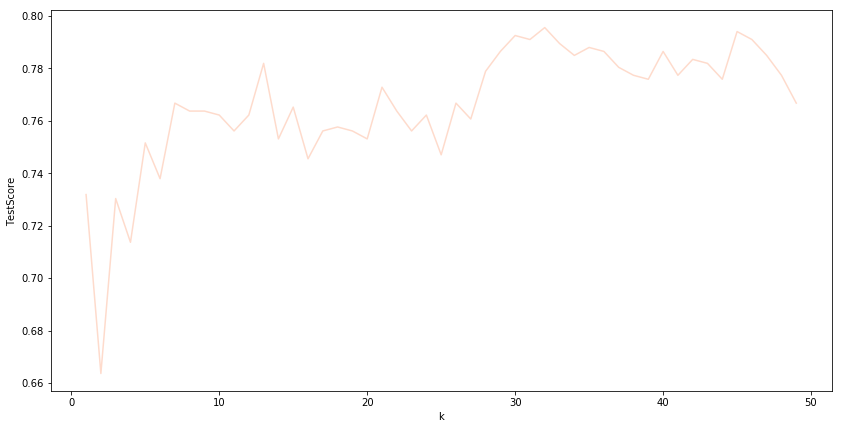

In [276]:
fig, ax = plt.subplots(1,1,figsize=(14,7))

sns.lineplot(x=knnDataframe['k'],y=knnDataframe['TestScore'])

#### Unscaled features

In [277]:
knnDataframe = pd.DataFrame(columns=['k','TestScore'])
knnDataframe

for k in range(1,50):

    numOfNeighbors = k

    knnClassifier = KNeighborsClassifier(n_neighbors=numOfNeighbors)
    
    knnClassifier.fit(X_train,y_train)
    
 
    y_pred = knnClassifier.predict(X_test)
    
    testScore = accuracy_score(y_pred,y_test)

    knnDataframe = knnDataframe.append({'k': numOfNeighbors,'TestScore':testScore}, ignore_index=True)
    
knnDataframe.nlargest(5,'TestScore')

,k,TestScore
6,7.0,0.945455
10,11.0,0.940909
13,14.0,0.940909
8,9.0,0.937879
12,13.0,0.937879


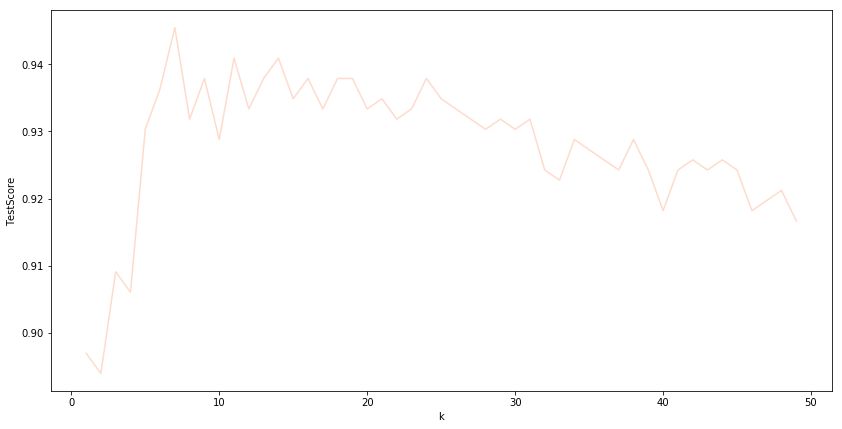

In [278]:
fig, ax = plt.subplots(1,1,figsize=(14,7))

sns.lineplot(x=knnDataframe['k'],y=knnDataframe['TestScore'])

Knn gives an accuracy of about 94% on the test set with the best value of k being 7.

We will try to get an even better score by using Grid Search to find optimal hyperparameters, apart from number of neighbors which we already explored. 

#### Grid Search

In [279]:
from sklearn.model_selection import GridSearchCV

knnClassifier = KNeighborsClassifier()

param_grid = [    
    {
    'n_neighbors': np.arange(1,26) ,
    'weights' : ['uniform','distance'],
    'algorithm' : ['auto','ball_tree','kd_tree','brute'],
    'metric' : ['minkowski','euclidean','manhattan'],
    
    }
]


clf = GridSearchCV(knnClassifier, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

best_clf = clf.fit(X_train,y_train)

Fitting 3 folds for each of 600 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 202 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed:   14.1s finished


In [280]:
best_clf.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=23, p=2,
           weights='distance')

In [208]:
print (f'Accuracy - : {best_clf.score(X_train,y_train):.3f}')

Accuracy - : 1.000


Testing the best hyperparameters on our test data set.

In [281]:
knnClassifier = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=23, p=2,
           weights='distance')
    
knnClassifier.fit(X_train,y_train)

y_pred = knnClassifier.predict(X_test)
testScore = accuracy_score(y_pred,y_test)
testScore

0.9378787878787879

We got a slightly worse score than before but not by a lot.  

Our final best accuracy using knn is around 94%.  

The final knn model is the one below.

In [284]:
knnClassifier = KNeighborsClassifier(n_neighbors=7)

knnClassifier.fit(X_train,y_train)

y_pred = knnClassifier.predict(X_test)
testScore = accuracy_score(y_pred,y_test)
testScore

0.9454545454545454

We will proceed with other algorithms.

### Logistic Regression

In [285]:
from sklearn.linear_model import LogisticRegression

logRegClassifier = LogisticRegression(solver='liblinear',multi_class='auto')


logRegClassifier.fit(X_train,y_train)

y_pred = logRegClassifier.predict(X_test)
testScore = accuracy_score(y_pred,y_test)


testScore

0.7545454545454545

#### Grid Search

Hyper-parameter tuning using Grid Search

In [200]:
from sklearn.model_selection import GridSearchCV

logRegClassifier = LogisticRegression()

param_grid = [    
    {'penalty' : ['l1'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['liblinear','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    },
    {
       'penalty' : [ 'l2'],
        'C' : np.logspace(-4, 4, 20),
        'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
        'max_iter' : [100, 1000,2500, 5000]
        
    }
]


clf = GridSearchCV(logRegClassifier, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

best_clf = clf.fit(X_train,y_train)

Fitting 3 folds for each of 560 candidates, totalling 1680 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 227 tasks      | elapsed:   32.7s
[Parallel(n_jobs=-1)]: Done 484 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 734 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 1084 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 1534 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 1680 out of 1680 | elapsed:  5.3min finished
C:\Users\Paul\.conda\envs\ml\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Paul\.conda\envs\ml\lib\site-packages\scipy\optimize\linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Paul\.conda\envs\ml\lib\site-packages\scipy\optimize\linesearch.py:313

In [201]:
best_clf.best_estimator_

LogisticRegression(C=0.0006951927961775605, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=1000,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='newton-cg', tol=0.0001, verbose=0, warm_start=False)

In [202]:
print (f'Accuracy - : {best_clf.score(X_train,y_train):.3f}')

Accuracy - : 0.901


In [211]:
logRegClassifier = LogisticRegression(C=0.0006951927961775605, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=1000,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='newton-cg', tol=0.0001, verbose=0, warm_start=False)


logRegClassifier.fit(X_train,y_train)

y_pred = logRegClassifier.predict(X_test)
testScore = accuracy_score(y_pred,y_test)


testScore

C:\Users\Paul\.conda\envs\ml\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Paul\.conda\envs\ml\lib\site-packages\scipy\optimize\linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Paul\.conda\envs\ml\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Paul\.conda\envs\ml\lib\site-packages\scipy\optimize\linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Paul\.conda\envs\ml\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line s

0.8909090909090909

Our best logistic regression model got 89% accuracy on the test set which is lower than knn.  
Lets test a few more algorithms before making a final choice.

### Support Vector Machine

In [286]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler


In [289]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33,random_state =0)
X_train.head(5)

,ram,battery_power,px_width,px_height,mobile_wt,int_memory,n_cores
295,1652,1162,997,56,114,56,7
364,1470,916,992,188,195,36,4
862,3078,1065,928,188,89,14,2
1751,2175,508,1195,102,82,50,5
1403,2674,1328,1156,602,144,27,3


In [290]:
X_train_scaled = scaler.fit_transform(X_train)
scaler.mean_

C:\Users\Paul\.conda\envs\ml\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Paul\.conda\envs\ml\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([2096.94 , 1237.822, 1257.541,  655.897,  139.488,   31.993,
          4.513])

In [299]:
svmClassifier = SVC()

svmClassifier.fit(X_train_scaled,y_train)

X_test_scaled = scaler.fit_transform(X_test)


y_pred = svmClassifier.predict(X_test_scaled)

testScore = accuracy_score(y_pred,y_test)
testScore

C:\Users\Paul\.conda\envs\ml\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Paul\.conda\envs\ml\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


0.9015151515151515

    
#### Grid Search

In [300]:
from sklearn.model_selection import GridSearchCV

svmClassifier = SVC(random_state=1)

param_grid = [{'kernel': ['rbf'], 'gamma': [1,0.1,0.01,0.001],
                     'C': [0.1,1, 10, 100, 1000]},
              {'kernel': ['linear'], 'C': [0.1,1, 10, 100, 1000]}
             ]


clf = GridSearchCV(svmClassifier, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

best_clf = clf.fit(X_train_scaled,y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    0.8s finished


In [301]:
best_clf.best_estimator_

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=1,
  shrinking=True, tol=0.001, verbose=False)

In [297]:
print (f'Accuracy - : {best_clf.score(X_train_scaled,y_train):.3f}')

Accuracy - : 0.985


In [302]:
svmClassifier = SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=1,
  shrinking=True, tol=0.001, verbose=False)

svmClassifier.fit(X_train_scaled,y_train)

X_test_scaled = scaler.fit_transform(X_test)


y_pred = svmClassifier.predict(X_test_scaled)

testScore = accuracy_score(y_pred,y_test)
testScore

C:\Users\Paul\.conda\envs\ml\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Paul\.conda\envs\ml\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


0.9333333333333333

Our final best accuracy using SVM is 0.93

### Naive Bayes

In [303]:
from sklearn.naive_bayes import GaussianNB

In [304]:
naiveBayesClassifier = GaussianNB()


naiveBayesClassifier.fit(X_train,y_train)

y_pred = naiveBayesClassifier.predict(X_test)
testScore = accuracy_score(y_pred,y_test)


testScore

0.8196969696969697

Naive Bayes doesn't have any hyper-parameters to tune so our final score is 0.82.

### Random Forest

In [305]:
from sklearn.ensemble import RandomForestClassifier

In [307]:
randomForestClassifier = RandomForestClassifier(random_state=42)


randomForestClassifier.fit(X_train,y_train)

y_pred = randomForestClassifier.predict(X_test)
testScore = accuracy_score(y_pred,y_test)


testScore

C:\Users\Paul\.conda\envs\ml\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8712121212121212

#### Grid Search

In [312]:
randomForestClassifier = RandomForestClassifier(random_state=42)

param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}


CV_rfc = GridSearchCV(estimator=randomForestClassifier, param_grid=param_grid, cv = 3, verbose=True, n_jobs=-1)
CV_rfc.fit(X_train, y_train)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   23.3s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [200, 500], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [4, 5, 6, 7, 8], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

In [313]:
CV_rfc.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [314]:
print (f'Accuracy - : {CV_rfc.score(X_train,y_train):.3f}')

Accuracy - : 0.998


In [315]:
randomForestClassifier = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)


randomForestClassifier.fit(X_train,y_train)

y_pred = randomForestClassifier.predict(X_test)
testScore = accuracy_score(y_pred,y_test)


testScore

0.8833333333333333

Best accuracy using random forest comes out to be 88%.

### Neural Network

In [316]:
from sklearn.neural_network import MLPClassifier

#### Unscaled Features

In [320]:
neuralNetworkClassifier = MLPClassifier(max_iter=400)


neuralNetworkClassifier.fit(X_train,y_train)

y_pred = neuralNetworkClassifier.predict(X_test)
testScore = accuracy_score(y_pred,y_test)


testScore

0.6181818181818182

#### Scaled Features

In [321]:

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

neuralNetworkClassifier = MLPClassifier(max_iter=400)
neuralNetworkClassifier.fit(X_train_scaled,y_train)

X_test_scaled = scaler.fit_transform(X_test)


y_pred = neuralNetworkClassifier.predict(X_test_scaled)

testScore = accuracy_score(y_pred,y_test)
testScore

C:\Users\Paul\.conda\envs\ml\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Paul\.conda\envs\ml\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Paul\.conda\envs\ml\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Paul\.conda\envs\ml\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Paul\.conda\envs\ml\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data wit

0.9287878787878788

Scaling the features increases the performance of our neural network drastically.  
Let's see if we can further increase the performance by tuning some hyperparameters.

#### Grid Search

In [329]:
neuralNetworkClassifier = MLPClassifier(max_iter=400)

param_grid = {
    'hidden_layer_sizes': [(50,50), (100,50),(100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}


CV_MLP = GridSearchCV(estimator=neuralNetworkClassifier, param_grid=param_grid, cv = 3, verbose=True, n_jobs=-1)
CV_MLP.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   15.2s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:   51.1s finished
C:\Users\Paul\.conda\envs\ml\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=400, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'hidden_layer_sizes': [(50, 50), (100, 50), (100,)], 'activation': ['tanh', 'relu'], 'solver': ['sgd', 'adam'], 'alpha': [0.0001, 0.05], 'learning_rate': ['constant', 'adaptive']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

In [330]:
CV_MLP.best_estimator_

MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='adaptive',
       learning_rate_init=0.001, max_iter=400, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [331]:
print (f'Accuracy - : {CV_MLP.score(X_train_scaled,y_train):.3f}')

Accuracy - : 0.993


In [332]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

neuralNetworkClassifier = MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='adaptive',
       learning_rate_init=0.001, max_iter=400, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)



neuralNetworkClassifier.fit(X_train_scaled,y_train)

X_test_scaled = scaler.fit_transform(X_test)


y_pred = neuralNetworkClassifier.predict(X_test_scaled)

testScore = accuracy_score(y_pred,y_test)
testScore

C:\Users\Paul\.conda\envs\ml\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Paul\.conda\envs\ml\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Paul\.conda\envs\ml\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Paul\.conda\envs\ml\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Paul\.conda\envs\ml\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data wit

0.9333333333333333

Using Grid Search we found hyperparameters that increase the performance of our first model by a small amount.

### XGBoost

In [335]:
import xgboost

In [353]:
XGBoostClassifier = xgboost.XGBClassifier()


XGBoostClassifier.fit(X_train,y_train)

y_pred = XGBoostClassifier.predict(X_test)
testScore = accuracy_score(y_pred,y_test)


testScore

[15:44:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.9287878787878788

#### Randomized Search

In [337]:
from sklearn.model_selection import RandomizedSearchCV

In [354]:
XGBoostClassifier = xgboost.XGBClassifier()

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7,1 ]
    
}

random_search=RandomizedSearchCV(XGBoostClassifier,param_distributions=params,n_iter=5,n_jobs=-1,cv=3,verbose=3)

random_search.fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[15:44:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    1.3s finished
C:\Users\Paul\.conda\envs\ml\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
       colsample_bynode=None, colsample_bytree=None, gamma=None,
       gpu_id=None, importance_type='gain', interaction_constraints=None,
       learning_rate=None, max_delta_step=None, max_depth=None,
       min_child_w...e,
       tree_method=None, use_label_encoder=True, validate_parameters=None,
       verbosity=None),
          fit_params=None, iid='warn', n_iter=5, n_jobs=-1,
          param_distributions={'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3], 'max_depth': [3, 4, 5, 6, 8, 10, 12, 15], 'min_child_weight': [1, 3, 5, 7], 'gamma': [0.0, 0.1, 0.2, 0.3, 0.4], 'colsample_bytree': [0.3, 0.4, 0.5, 0.7, 1]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=3)

In [355]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.7, gamma=0.3, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.25, max_delta_step=0, max_depth=5,
       min_child_weight=7, missing=nan, monotone_constraints='()',
       n_estimators=100, n_jobs=4, num_parallel_tree=1,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=None, subsample=1,
       tree_method='exact', use_label_encoder=True, validate_parameters=1,
       verbosity=None)

In [356]:
XGBoostClassifier = xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.7, gamma=0.2, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.2, max_delta_step=0, max_depth=8,
       min_child_weight=3, monotone_constraints='()',
       n_estimators=100, n_jobs=4, num_parallel_tree=1,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=None, subsample=1,
       tree_method='exact', use_label_encoder=True, validate_parameters=1,
       verbosity=None)


XGBoostClassifier.fit(X_train,y_train)

y_pred = XGBoostClassifier.predict(X_test)
testScore = accuracy_score(y_pred,y_test)


testScore

[15:44:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.9121212121212121

XGBoost gave us an accuracy score of about 92%.

### Final model

The model that gave us the best accuracy on the training set is knn with k=7.  
We will proceed with this model.  Lets train it one final time from end to end.

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33,random_state =0)

print(X_train.shape)
X_train.head(5)

(1340, 7)


,ram,battery_power,px_width,px_height,mobile_wt,int_memory,n_cores
295,1652,1162,997,56,114,56,7
364,1470,916,992,188,195,36,4
862,3078,1065,928,188,89,14,2
1751,2175,508,1195,102,82,50,5
1403,2674,1328,1156,602,144,27,3


In [9]:
from sklearn.neighbors import KNeighborsClassifier


knnClassifier = KNeighborsClassifier(n_neighbors=7)

knnClassifier.fit(X_train,y_train)

y_pred = knnClassifier.predict(X_test)


testScore = accuracy_score(y_pred,y_test)
testScore

0.9454545454545454

#### Confusion Matrix

In [10]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,y_pred)

array([[165,   1,   0,   0],
       [  5, 139,   3,   0],
       [  0,   8, 148,   9],
       [  0,   0,  10, 172]], dtype=int64)

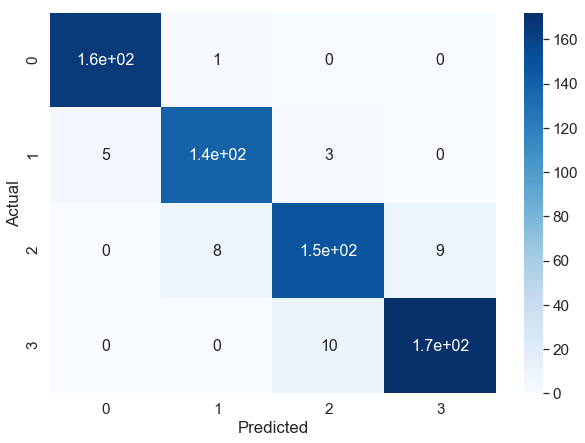

In [11]:
data = confusion_matrix(y_test,y_pred)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

Our model is not perfect and it makes some errors.   
However, as you can see from the confusion matrix, the number of correct predictions is way higher than the number of false predictions.  
If we look at Actual = 3 (very high price range), our model correctly predicts 170 phones and misclassifies 10 phones by predicting that they belong to the high price range (price range = 2).  

It looks like when our model misclassifies a phone, the predicted class is always adjacent to the correct class, which means its not very far off.  

For example, when the actual class is 1, our model will either predict 1 (correct), 0 (false but only off by 1) or 2 (false but only off by 1). It never predicts 3 which would be way off.  

For the purpose of this model, I think that we can handle these type of errors and the model is adequate.



# Deployment

In [2]:
import pickle

In [370]:
pickle_out = open("classifier.pkl","wb")

In [371]:
pickle.dump(knnClassifier,pickle_out)

In [372]:
pickle_out.close()

In [3]:
pickle_in = open('classifier.pkl','rb')

classifier = pickle.load(pickle_in)

In [7]:
ram = 3000
battery_power = 2000
px_width = 997
px_height = 56
mobile_wt = 114
int_memory = 56
n_cores = 7



prediction =  classifier.predict([[ram,battery_power,px_width,px_height,mobile_wt,int_memory,n_cores]])
prediction[0]

3